# TOC

  - [Distribution of graduation rates across all schools](#grad_rates)
  - [Networks](#networks)
  - [Zipcodes](#zipcodes)
  - [Charter](#charter)

In [30]:
import pandas as pd
import numpy as np
from sys import path
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

pd.set_option('display.max_columns', None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# 660 schools across each profile
# 1819 is the only csv with valid headers
profile_1819 = pd.read_csv('../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv', header='infer')
# 95 columns

profile_1718 = pd.read_csv('../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1718.csv')
# 92 columns

profile_1617 = pd.read_csv('../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv')
# 91 columns



In [3]:
hs_1819 = profile_1819[profile_1819['Is_High_School']==True]
hs_1819.shape

(183, 95)

<a id='grad_rates'></a>

# Distribution of Graduation Rates

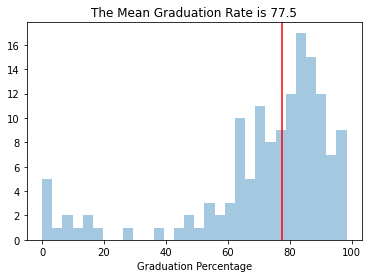

In [67]:
fig, ax = plt.subplots()
sns.distplot(hs_1819['Graduation_Rate_School'], bins=30, ax=ax, kde=False)
mean_gradperc = hs_1819['Graduation_Rate_Mean'].min()
ax.axvline(mean_gradperc, c='r')
ax.set_title(f'The Mean Graduation Rate is {mean_gradperc}')
ax.set_xlabel('Graduation Percentage');

# Inspecting High Schools with Graduation Rates below 40

In [77]:
hs_1819[hs_1819["Graduation_Rate_School"] < 40]['Network'].value_counts()

Options       8
Network 14    2
Network 16    2
Network 15    1
AUSL          1
Name: Network, dtype: int64

AUSL stands for Academy for Urban School Leadership.  

In [113]:
# There are 5 AUSL Schools
hs_1819[hs_1819['Network']=='AUSL']['School_ID'].count()

5

In [115]:
gr = hs_1819[hs_1819['Network']=='AUSL']['Graduation_Rate_School']
hs_1819.head()

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude,School_Longitude,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date
0,400172,9647,66255,ASPIRA - BUSINESS & FINANCE HS,ASPIRA Business and Finance,HS,True,False,False,False,The ASPIRA Business and Finance High School ta...,Director,Dr. Hector Freytas,Assistant Principal,Veronica Galindo,2989 N MILWAUKEE AVE,Chicago,Illinois,60618,7.732521e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.aspirail.org/ASPIRASchools,https://www.facebook.com/ASPIRABusiness,https://twitter.com/ASPIRABusiness,NaN,NaN,False,"9,10,11,12",9-12,633,414,130,195,17,597,10,4,1,0,0,4,0,0,There are 633 students enrolled at ASPIRA - BU...,The largest demographic at ASPIRA - BUSINESS &...,True,NaN,NaN,7:30AM-4:30PM,NaN,3:15PM-4:30PM,7:30AM,"Spanish, Spanish for Heritage Speakers",True,NaN,True,NaN,NaN,NaN,NaN,NaN,56,Blue,NaN,41.935726,-87.718204,NaN,NaN,NaN,68.2,NaN,78.2,Level 2+,NOT APPLICABLE,"This school received a Level 2+ rating, which ...","Schools that are open to all Chicago children,...",School Year 2018-2019,Dean of Students,Mike Simball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charter,True,False,False,True,07/01/2015 12:00:00 AM,NaN
2,609780,2090,41111,MARINE LEADERSHIP AT AMES HS,Marine Leadership Academy at Ames,HS,True,True,False,False,Marine Leadership Academy prepares leaders in ...,Principal,Mrs.Erin A Galfer,Other,Juan Carlos Zayas,1920 N HAMLIN AVE,Chicago,Illinois,60647,7.735345e+09,7.735345e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://marine.cps.edu,https://www.facebook.com/marineleadershipacademy,NaN,NaN,NaN,False,"7,8,9,10,11,12",7-12,847,825,79,158,17,817,8,2,1,0,0,2,0,0,There are 847 students enrolled at MARINE LEAD...,The largest demographic at MARINE LEADERSHIP A...,True,NaN,NaN,07:45 AM-03:25 PM,NaN,NaN,NaN,Spanish,True,NaN,True,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN,41.916045,-87.721742,NaN,NaN,59.2,68.2,NaN,78.2,Level 1,GOOD STANDING,"This school received a Level 1 rating, which i...",For students who wish to develop leadership an...,School Year 2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISP,True,False,True,True,09/01/2004 12:00:00 AM,NaN
5,609750,1750,49051,SIMPSON HS,Simpson Academy HS for Young Women,HS,True,True,True,False,``,Principal,Mrs.Sherita D Carter-King,Guidance Counselor,Veronica Falls,1321 S PAULINA ST,Chicago,Illinois,60608,7.735348e+09,7

In [123]:
hs_1819[(hs_1819['Network']=='AUSL') & (hs_1819['Graduation_Rate_School'] < 40)]['Summary']

252    As a Turnaround school, Orr is redefining its ...
Name: Summary, dtype: object

### Turnaround School
Chicago Public Schools (CPS) turned over management of Orr Academy High School to AUSL in 2008 as a turnaround school. Turning around a school is one approach that CPS uses to improve neighborhood schools that have been failing for many years. 

In [126]:
orr = hs_1819[(hs_1819['Network']=='AUSL') & (hs_1819['Graduation_Rate_School'] < 40)]
orr

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude,School_Longitude,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date
252,610389,1830,28151,ORR HS,Orr Academy High School,HS,True,False,False,False,"As a Turnaround school, Orr is redefining its ...",Principal,Shanele E Andrews,Assistant Principal,Nakeisha Knight,730 N PULASKI RD,Chicago,Illinois,60624,7.735346e+09,7.735347e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.orracademy.org,https://www.facebook.com/orracademyhighschool,https://twitter.com/orracademy,NaN,NaN,True,"9,10,11,12",9-12,226,210,56,7,193,29,3,0,0,0,0,0,1,0,There are 226 students enrolled at ORR HS. 92...,The largest demographic at ORR HS is Black. T...,True,NaN,NaN,7:45am - 2:28pm (Monday- Friday),NaN,2:30pm - 6:00pm,7:30am,Spanish,True,False,True,NaN,NaN,NaN,NaN,NaN,"53, 66",NaN,NaN,41.894449,-87.726166,NaN,NaN,56.4,68.2,38.3,78.2,Level 2,INTENSIVE SUPPORT,"This school received a Level 2 rating, which i...",Schools that have an attendance boundary. Gene...,School Year 2018-2019,Counselor,Tabitha Younan,Counselor,Shalina Hampton,Operations Manager/School Culture,Thomas Johnson,NaN,NaN,NaN,NaN,AUSL,True,False,False,True,07/01/2008 12:00:00 AM,NaN


In [127]:
orr['Graduation_Rate_School']

252    38.3
Name: Graduation_Rate_School, dtype: float64

<a id='networks'></a>

# Networks

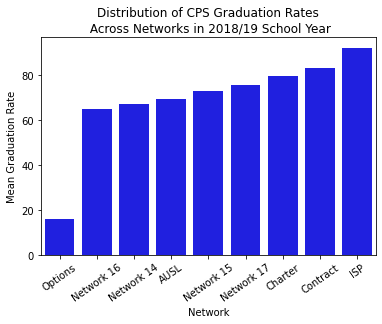

In [188]:
network = hs_1819.groupby('Network')['Graduation_Rate_School'].mean().sort_values().index
mean_grad_rate = hs_1819.groupby('Network')['Graduation_Rate_School'].mean().sort_values().values

fig, ax = plt.subplots()
sns.barplot(network, mean_grad_rate, ax=ax, color='blue')
ax.tick_params(axis='x', labelrotation=35)
ax.set_title('Distribution of CPS Graduation Rates\n Across Networks in 2018/19 School Year')
ax.set_ylabel('Mean Graduation Rate');

### Distribution without Options Network

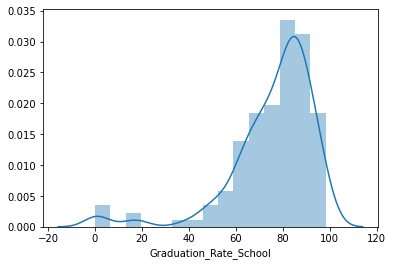

In [142]:
non_options = hs_1819[hs_1819['Network'] != 'Options']

fig, ax = plt.subplots()
sns.distplot(non_options['Graduation_Rate_School'])

In [5]:

print(f'''
        There are {len(hs_1819[hs_1819['Graduation_Rate_School'] < 40])} schools 
        with a sub 40 graduation rate in the 18/19 SY.''')


        There are 14 schools 
        with a sub 40 graduation rate in the 18/19 SY.


In [6]:
print(f'''
        Of those 14,  {len(hs_1819[(hs_1819['Graduation_Rate_School'] < 40)
                        & (hs_1819['Network'] == 'Options')
                                  ]
                          )} schools are from the Options Network.''')


        Of those 14,  8 schools are from the Options Network.


In [7]:
print(f"""
        There are {hs_1819[hs_1819['Network'] == 'Options'].shape[0]} Options High Schools.""")


        There are 37 Options High Schools.


In [9]:
lat = hs_1819['School_Latitude']
long = hs_1819["School_Longitude"]

In [33]:
hs_1819['Network'].value_counts()

Charter       47
Options       37
Network 16    19
Network 17    18
Network 15    18
ISP           17
Network 14    16
AUSL           5
Contract       2
Name: Network, dtype: int64

Text(0.5, 1.0, 'CPS High Schools by Network')

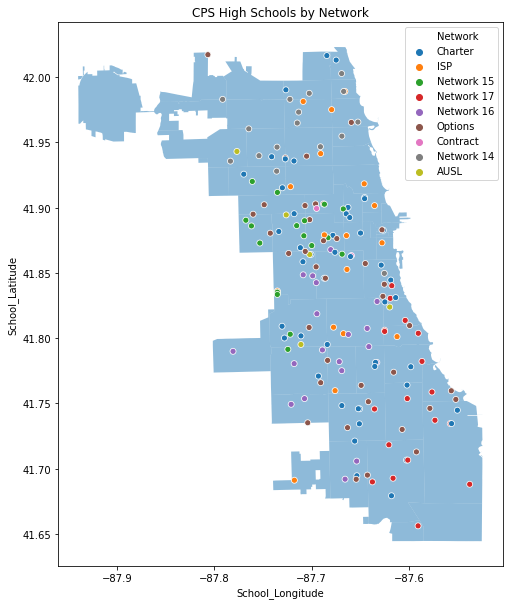

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

gpd.read_file('../../data/shape_files/geo_export_74e2d584-f137-45fb-b412-80348c0deab2.shp').plot(ax=ax, alpha=.5)
sns.scatterplot(hs_1819['School_Longitude'], hs_1819['School_Latitude'], hue=hs_1819['Network'])
ax.set_title('CPS High Schools by Network')

<a id='zipcodes'></a>

# Is Graduation Rate Geographically Distributed?

## Zipcodes

To start answering that question, I first plot a heatmap showing the mean graduation rates across the city.

In [144]:
hs1819_gpd = gpd.read_file('../../data/shape_files/geo_export_74e2d584-f137-45fb-b412-80348c0deab2.shp')

In [202]:
def map_zip_gr_means(df, gdf):
    
    '''
    Parameters:
    df: a dataframe of a school year's CPS performance data
    gdf: a geopandas dataframe with zip code shapefiles
    
    Returns:
    A geopandas dataframe with mean graduation rates per zip code included
    
    '''

    # Zipcodes in the geopandas dataframe are strings, so convert the groupby indexes to strings to match
    mean_gr_by_zip = {str(zc):gr for zc, gr in 
                            zip(df.groupby('Zip')['Graduation_Rate_School'].mean().index, 
                            df.groupby('Zip')['Graduation_Rate_School'].mean().values)
                          }
    
    gdf['zip_gr'] = gdf['zip'].map(mean_gr_by_zip)
    
    return gdf

Text(0.5, 1.0, 'CPS Graduation Rate Mean sy1819 by Zip Code')

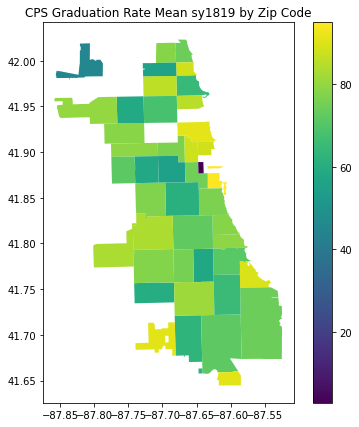

In [203]:
fig, ax = plt.subplots(figsize=(7,7))

map_zip_gr_means(hs_1819, hs1819_gpd).plot('zip_gr', ax=ax, legend=True)
ax.set_title('CPS Graduation Rate Mean sy1819 by Zip Code')

### Same Plot without Options Schools

Text(0.5, 1.0, 'CPS Graduation Rate Means sy1819 by Zip Code:\n No Options Schools Included')

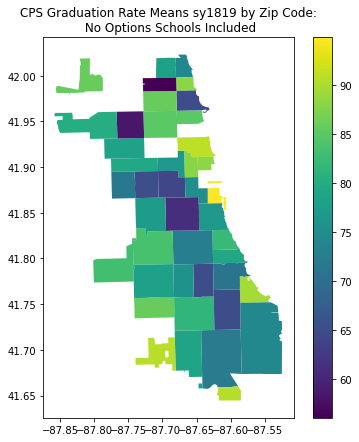

In [212]:
fig, ax = plt.subplots(figsize=(7,7))

map_zip_gr_means(non_options, hs1819_gpd).plot('zip_gr', ax=ax, legend=True)
ax.set_title('CPS Graduation Rate Means sy1819 by Zip Code:\n No Options Schools Included')

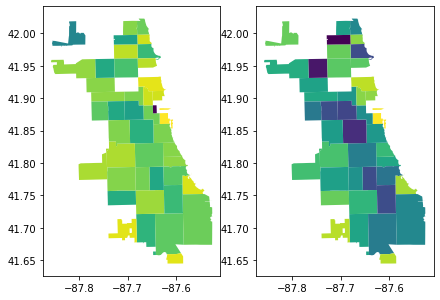

In [214]:
# The side by side plot does not have any clear takeaway
fig, ax = plt.subplots(1,2, figsize=(7,7))dd

map_zip_gr_means(hs_1819, hs1819_gpd).plot('zip_gr', ax=ax[0], )
map_zip_gr_means(non_options, hs1819_gpd).plot('zip_gr', ax=ax[1])


In [216]:
mean_gr_by_zip = hs_1819.groupby('Zip')['Graduation_Rate_School'].mean()

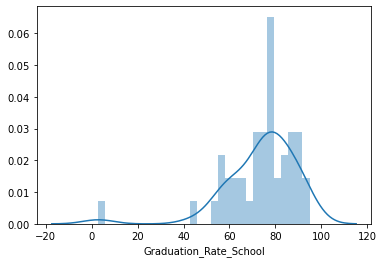

In [218]:
fig, ax = plt.subplots()
sns.distplot(mean_gr_by_zip, bins=30, ax = ax)

In [96]:
# 60661 looks to be an outlier with a grad rate of 2.9
mean_gr_by_zip[mean_gr_by_zip == mean_gr_by_zip.min()]

Zip
60661    2.9
Name: Graduation_Rate_School, dtype: float64

In [102]:
hs_1819.groupby('Zip')['Graduation_Rate_School'].count().sort_values(ascending=False)[0:10]

Zip
60623    9
60608    7
60624    7
60612    6
60617    5
60618    5
60620    5
60653    5
60621    5
60628    5
Name: Graduation_Rate_School, dtype: int64

Text(0.5, 1.0, 'Without the Options Schools\n Grad Rate Across Zips More Normally Distributed')

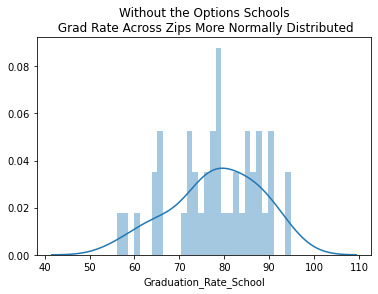

In [109]:
no_options_by_zip = non_options.groupby('Zip')['Graduation_Rate_School'].mean()

fig, ax = plt.subplots()

sns.distplot(no_options_by_zip, bins=30, ax=ax)
ax.set_title('Without the Options Schools\n Grad Rate Across Zips More Normally Distributed')